Plotting and saving data for: new_straight_no_noise.csv


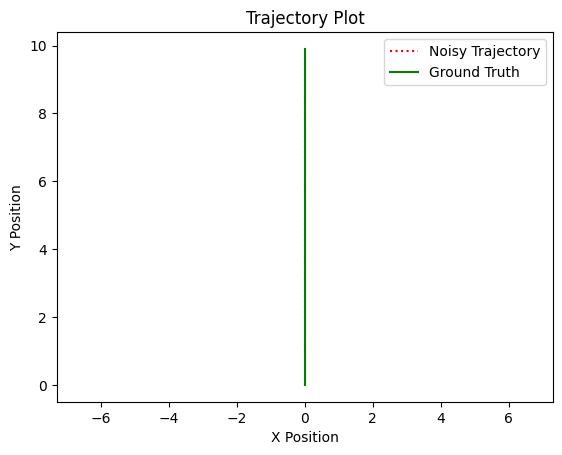

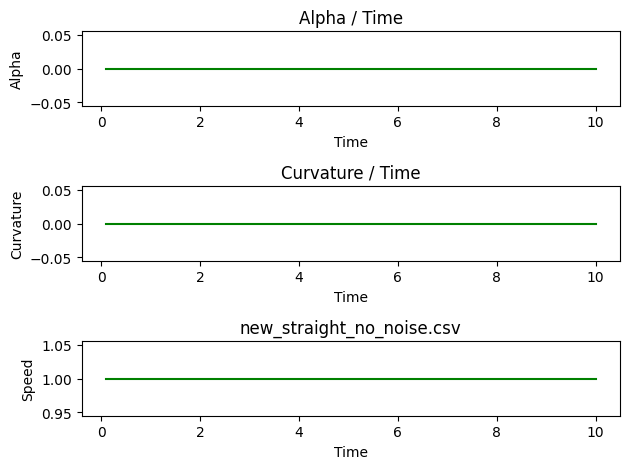

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

def save_data_simple(t, xx, yy, filename):
    """Save data to CSV file without curvature and velocity details."""
    data = pd.DataFrame({
        'time': t,
        'Pos_x': xx,
        'Pos_y': yy
    })
    data.to_csv(filename, index=False)
    
def calculate_trajectory(vv, kk, D, Ts):
    vl = vv / (1 - kk * 0.5 * D)
    vr = vv / (1 + kk * 0.5 * D)
    t = Ts * np.arange(1, len(vv) + 1)
    xx, yy, aa, sl, sr = [0], [0], [0], [0], [0]
    
    for k in range(1, len(vv)):
        xx.append(xx[-1] - vv[k - 1] * Ts * np.sin(aa[-1]))
        yy.append(yy[-1] + vv[k - 1] * Ts * np.cos(aa[-1]))
        aa.append(aa[-1] + vv[k - 1] * Ts * kk[k - 1])
        sl.append(sl[-1] + vl[k - 1] * Ts)
        sr.append(sr[-1] + vr[k - 1] * Ts)
    
    sl = np.round(100 * np.array(sl)) / 100
    sr = np.round(100 * np.array(sr)) / 100
    
    return np.array(xx), np.array(yy), np.array(aa), sl, sr, t

def generate_x_zero_scenario(total_points, speed):
    """ Generate values where the vehicle moves vertically along the y-axis. """
    vv = np.full(total_points, speed)  # Constant speed
    kk = np.zeros(total_points)  # Zero curvature for a straight line
    xx = np.zeros(total_points)  # x-coordinate is always zero
    yy = np.cumsum(vv) * 0.1  # Increment y-coordinate based on speed and a small time step (e.g., 0.1s)
    return xx, yy

def generate_y_zero_scenario(total_points, speed):
    """ Generate values where the vehicle moves horizontally along the x-axis. """
    vv = np.full(total_points, speed)  # Constant speed
    kk = np.zeros(total_points)  # Zero curvature for a straight line
    yy = np.zeros(total_points)  # y-coordinate is always zero
    xx = np.cumsum(vv) * 0.1  # Increment x-coordinate based on speed and a small time step (e.g., 0.1s)
    return xx, yy

def plot_scenario(xx, yy, title):
    """ Plot the trajectory for given x and y coordinates. """
    plt.figure()
    plt.plot(xx, yy, marker='o')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(title)
    plt.grid(True)
    plt.axis('equal')
    plt.show()

def save_data(t, y, xx, yy, aa, kk, vv, filename):
    data = pd.DataFrame({
        'time': t,
        'Pos_x': y[:, 0],
        'Pos_y': y[:, 1],
        'GT_x': xx,
        'GT_y': yy,
        'GT_alpha': aa,
        'GT_Kr': kk,
        'GT_v': vv
    })
    data.to_csv(filename, sep=',', index=False)

def plot_data(y, xx, yy, t, aa, kk, vv, title=None):
    plt.figure(1)
    plt.clf()
    plt.plot(y[:, 0], y[:, 1], 'r:', label='Noisy Trajectory')
    plt.plot(xx, yy, 'g', label='Ground Truth')
    plt.title('Trajectory Plot')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.legend()
    plt.axis('equal')
    
    plt.figure(2)
    plt.clf()
    
    plt.subplot(311)
    plt.plot(t, aa, 'g')
    plt.title('Alpha / Time')
    plt.xlabel('Time')
    plt.ylabel('Alpha')
    
    plt.subplot(312)
    plt.plot(t, kk, 'g')
    plt.title('Curvature / Time')
    plt.xlabel('Time')
    plt.ylabel('Curvature')

    plt.subplot(313)
    plt.plot(t, vv, 'g')
    plt.title('Speed / Time')
    plt.xlabel('Time')
    plt.ylabel('Speed')

    plt.tight_layout()

    # Set the plot title
    if title is not None:
        plt.title(title)

    # Show or save the plot
    plt.show()
    plt.show()

def process_scenario_simple(vv, kk, filename, D, Ts, add_noise_flag=True, Rxy_lengths=None, Rxy_values=None):
    """
    Process the scenario, optionally adding noise.
    :param vv: Array of speeds.
    :param kk: Array of curvatures.
    :param filename: Name of the output file.
    :param D: Wheelbase of the vehicle.
    :param Ts: Sampling time.
    :param add_noise_flag: Flag to determine if noise should be added.
    :param Rxy_lengths: Lengths of segments for noise calculation.
    :param Rxy_values: Values of noise for each segment.
    """
    # Calculate trajectory
    xx, yy, aa, sl, sr, t = calculate_trajectory(vv, kk, D, Ts)

    if add_noise_flag and Rxy_lengths and Rxy_values:
        # Add noise
        Rxy = np.hstack([np.full((2, length), value) for length, value in zip(Rxy_lengths, Rxy_values)]) * 1e-2
        y = add_noise(xx, yy, Rxy)
    else:
        # Create y from xx and yy without noise
        y = np.vstack([xx, yy]).T

    # Save data
    save_data(t, y, xx, yy, aa, kk, vv, filename)

    # Print filename
    print(f"Plotting and saving data for: {filename}")

    # Plot data with title
    plot_data(y, xx, yy, t, aa, kk, vv, title=filename)

# # Example usage for a scenario without noise
# total_points = 100
# speed = 1
# filename = "straight_vertical_no_noise.csv"
# D = 0.5  # Wheelbase
# Ts = 0.1  # Sampling time
# vv = np.full(total_points, speed)
# kk = np.zeros(total_points)

# Example usage for a scenario without noise
total_points = 100
speed = 1
filename = "new_straight_no_noise.csv"
D = 0.5  # Wheelbase, needed for the calculation even if curvature is zero
Ts = 0.1  # Sampling time
vv = np.full(total_points, speed)  # Constant speed
kk = np.zeros(total_points)  # Zero curvature

process_scenario_simple(vv, kk, filename, D, Ts, add_noise_flag=False)
